#CAPM_Sharpe_Treynor

In this project, we are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, we will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

Project is divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. 

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. 

3. Run Capital Asset Pricing Model and interpret the results. 

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. 


In [ ]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
stocks = ['AMGN', 'GILD', '^IXIC']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 4, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  3 of 3 completed


The analysis covers the business day for the period of 01-01-2021 and 04-01-2021 with daily stock price data.

In [ ]:
stock_price.head()

Adj Close                                Close             \
                  AMGN       GILD         ^IXIC        AMGN       GILD   
Date                                                                     
2021-01-04  214.594559  55.588947  12698.450195  226.660004  60.110001   
2021-01-05  215.635986  55.487213  12818.959961  227.759995  60.000000   
2021-01-06  220.833755  57.290550  12740.790039  233.250000  61.950001   
2021-01-07  221.562775  57.817680  13067.480469  234.020004  62.520000   
2021-01-08  225.794815  58.298565  13201.980469  238.490005  63.040001   

                                High                                  Low  \
                   ^IXIC        AMGN       GILD         ^IXIC        AMGN   
Date                                                                        
2021-01-04  12698.450195  231.250000  60.160000  12958.719727  223.669998   
2021-01-05  12818.959961  228.899994  60.450001  12828.269531  224.350006   
2021-01-06  12740.790039  233.529999  62.080002  12909.629883  225.000000   
2021-01-07  13067.480469  235.369995  63.240002  13090.910156  231.470001   
2021-01-08  13201.980469  238.860001  63.410000  13208.089844  235.100006   

                                           Open                           \
                 GILD         ^IXIC        AMGN       GILD         ^IXIC   
Date                                                                       
2021-01-04  57.930000  12543.240234  231.250000  58.669998  12958.519531   
2021-01-05  59.619999  12665.650391  226.940002  60.230000  12665.650391   
2021-01-06  59.700001  12649.990234  225.000000  59.700001  12666.150391   
2021-01-07  61.520000  12867.339844  231.860001  61.900002  12867.339844   
2021-01-08  62.509998  13036.549805  235.529999  62.610001  13160.219727   

             Volume                        
               AMGN      GILD       ^IXIC  
Date                                       
2021-01-04  3088200  15520000  6546740000  
2021-01-05  2494000  13251100  6904420000  
2021-01-06  3754800  12222500  7648340000  
2021-01-07  2647800  10614700  6777010000  
2021-01-08  2511100   8389800  7223660000

###Interpretation
We are just taking close column because it is more trustworthy to be considered

In [ ]:
stock_price = stock_price['Close']

In [ ]:
stock_price.describe()

,AMGN,GILD,^IXIC
count,61.000000,61.000000,61.000000
mean,238.609346,64.481312,13351.456567
std,9.219495,1.960186,375.828072
min,221.910004,60.000000,12609.160156
25%,231.470001,63.070000,13070.690430
50%,237.220001,64.459999,13319.860352
75%,245.490005,65.529999,13597.969727
max,258.600006,68.459999,14095.469727


###Interpretation:
We can see that the stock prices are for 61 days.

*   Amgen std. deviation is 9 which means that its a risky stock as compared to the GILD with std. deviation of 1.96 which means it much stable with less risk involved
*   We can also see the min price, max price, mean and other parameters



To avoid trouble in coding, renaming ^IXIC to IXIC

In [ ]:
stock_price = stock_price.rename({'^IXIC' :'IXIC'},  axis='columns')

In [ ]:
stock_price.head()

,AMGN,GILD,IXIC
Date,,,
2021-01-04,226.660004,60.110001,12698.450195
2021-01-05,227.759995,60.000000,12818.959961
2021-01-06,233.250000,61.950001,12740.790039
2021-01-07,234.020004,62.520000,13067.480469
2021-01-08,238.490005,63.040001,13201.980469


Above are the stock prices for initial 5 days

In [ ]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#  my API key

In [ ]:
fred.search('DGS3MO')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DGS3MO,Daily,D,DGS3MO,2022-09-30 15:20:04-05:00,For further information regarding treasury con...,2022-09-29,1981-09-01,72,2022-10-03,2022-10-03,Not Seasonally Adjusted,NSA,Market Yield on U.S. Treasury Securities at 3-...,Percent,%


In [ ]:
risk_free = fred.get_series('DGS3MO')
risk_free

1981-09-01    17.01
1981-09-02    16.65
1981-09-03    16.96
1981-09-04    16.64
1981-09-07      NaN
              ...  
2022-09-23     3.24
2022-09-26     3.39
2022-09-27     3.35
2022-09-28     3.40
2022-09-29     3.36
Length: 10718, dtype: float64

This gives us the risk free rate which is not a literal meaning but it involves very less risk.

##2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

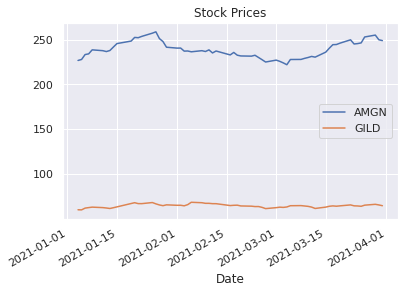

In [ ]:
stock_price.loc[:,['AMGN', 'GILD']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

###Interpretation



*   AMGN stocks are much volatile as we have discussed above, because of high std. deviation of 9.36 and that also can be observed in the graph above as it fluctuates good enough highs and lows
*   GILD is relatively stable as we have discussed above because of low std. deviation



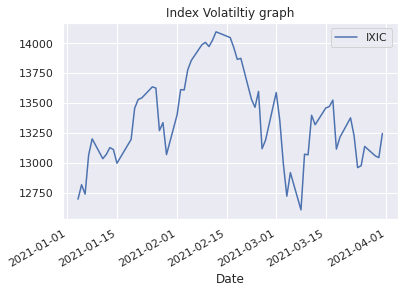

In [84]:
stock_price.loc[:,['IXIC']].plot()
plt.title('Index Volatiltiy graph')
plt.xlabel('Date')
plt.show()

In [ ]:
stock_price.corr()

,AMGN,GILD,IXIC
AMGN,1.000000,0.565544,0.105447
GILD,0.565544,1.000000,0.590324
IXIC,0.105447,0.590324,1.000000


##Interpretation of Correlation
Because multi-colinearity may result from high correlation in the context of linear regression, correlation is computed.
This deceives statisticians about the relevance of the findings.
The univariate nature of this study allows us to rule out the strong relationships. 

In [ ]:
returns = stock_price.pct_change()
returns.dropna(inplace=True)

We are removing 1st value as it is Nan and can cause problem in calculating further % change

In [81]:
risk_free = risk_free['2021-01-01':'2021-04-01']
risk_free = risk_free/90

In [82]:
risk_free.describe()

count    62.000000
mean      0.000006
std       0.000003
min       0.000001
25%       0.000004
50%       0.000005
75%       0.000010
max       0.000011
dtype: float64

###Interpretation of risk free rate:

As we can see that std deviation of these rates are not 0, which means that they are not risk free but definitely they are less volatile and stable rate and investments

In [ ]:
risk_free.dropna(inplace=True)

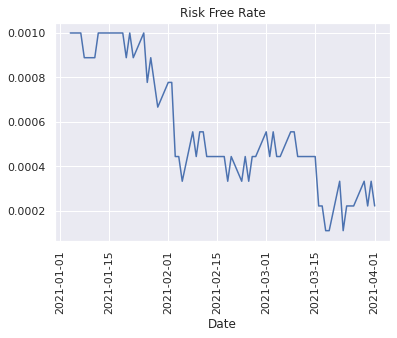

In [ ]:
plt.plot(risk_free)
plt.title('Risk Free Rate')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
returns.columns

Index(['AMGN', 'GILD', 'IXIC'], dtype='object')

In [ ]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - risk_free

In [ ]:
returns.head()

,AMGN,GILD,IXIC,excess_return_AMGN,excess_return_GILD,excess_return_IXIC
Date,,,,,,
2021-01-05,0.004853,-0.001830,0.009490,0.003853,-0.002830,0.008490
2021-01-06,0.024104,0.032500,-0.006098,0.023104,0.031500,-0.007098
2021-01-07,0.003301,0.009201,0.025641,0.002301,0.008201,0.024641
2021-01-08,0.019101,0.008317,0.010293,0.018212,0.007428,0.009404
2021-01-11,-0.003858,-0.008407,-0.012540,-0.004746,-0.009296,-0.013429


###Interpretation:

We know that if the excess returns are +ve then only its beneficial to go ahead and make an investment and if its -ve then its better to invest in government and much stable stocks

##CAPM Analysis

###3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

In [ ]:
import statsmodels.api as sm

In [ ]:
y_amgn = returns['excess_return_AMGN']
X = returns ['excess_return_IXIC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_amgn = sm.OLS(y_amgn, X)
capm_result_amgn = capm_amgn.fit()

In [ ]:
capm_result_amgn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_AMGN   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     10.45
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00202
Time:                        18:11:28   Log-Likelihood:                 182.50
No. Observations:                  60   AIC:                            -361.0
Df Residuals:                      58   BIC:                            -356.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_IXIC     0.3263      0.101      3.233      0.002       0.124       0.528
const                  0.0010      0.002      0.652      0.517      -0.002       0.004
==============================================================================
Omnibus:                        1.815   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.242
Skew:                           0.005   Prob(JB):                        0.537
Kurtosis:                       2.295   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_gild= returns['excess_return_GILD']
X = returns['excess_return_IXIC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_gild = sm.OLS(y_gild, X)
capm_result_gild = capm_gild.fit()

In [ ]:
capm_result_gild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_GILD   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.735
Date:                Mon, 03 Oct 2022   Prob (F-statistic):              0.104
Time:                        18:13:54   Log-Likelihood:                 164.21
No. Observations:                  60   AIC:                            -324.4
Df Residuals:                      58   BIC:                            -320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_IXIC     0.2264      0.137      1.654      0.104      -0.048       0.500
const                  0.0007      0.002      0.349      0.729      -0.003       0.005
==============================================================================
Omnibus:                        9.550   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.467
Skew:                           0.772   Prob(JB):                      0.00880
Kurtosis:                       4.185   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Interpretation
R_Squared value tells us the goodness of the model
We can see that the R-squared value is 0.045 which means that the stock "GILD" relies 4.5% on the NASDAQ stock exchange.

While "AMGEN" stock is having a R-squared value of 0.153 which means that this stock is relies on NASDAQ just by 15.3%.

For AMGEN beta value is 0.326
For GILD beta value is 0.2263 

This means that both the stocks are not risky and if compared GILD is less risky as compared to AMGEN


##Compare the Performance

##4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [ ]:
betas = [capm_result_amgn.params[0],
         capm_result_gild.params[0]]
betas

[0.32626978407567814, 0.22640634420629588]

In [ ]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [ ]:
rf = risk_free.mean()
rm = returns['IXIC'].mean()

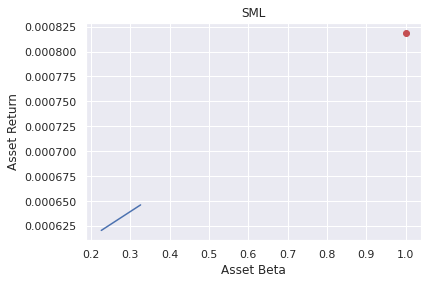

In [ ]:
SML(rf, rm, betas)

##Interpretation

Using Security Market Line SML, we may establish whether the stock is fairly priced or not.
Beta is an organized risk.
If a stock falls below SML, it should be sold because this suggests that it is overpriced.
However, since the company is currently inexpensive and is trading above SML, it can be bought.
Assume that the stocks' expected returns are those shown in the cell below. 



*   Amgen return Expectation: 0.2%
*   Gilead Sciences return Expectation: 0.3%



In [ ]:
ret_exp = [0.002, 0.003]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'ret_exp']
df_all.index = returns.columns[:2]
df_all

,betas,ret_exp
AMGN,0.326270,0.002
GILD,0.226406,0.003


In [ ]:
def over_under_val(rf, rm, stock):
    x = rf + (rm - rf) * df_all['betas'].loc[stock]# required rate of return(equilibrium)
    y = df_all['ret_exp'].loc[stock] # expectations
    if x < y:
        print('The stock is underpriced')
    elif x > y:
        print('The stock is overpriced')
    else:
        print('The stock is fairly priced')   

In [ ]:
over_under_val(rf, rm, 'AMGN')

The stock is underpriced


In [ ]:
over_under_val(rf, rm, 'GILD')

The stock is underpriced


In [ ]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
    return sharpe_ratios

In [72]:
returns.columns[:2]

Index(['AMGN', 'GILD'], dtype='object')

In [74]:
stocks = returns.columns[:2]
sharpe_ratios = sharpe(stocks, rf, 2)
sharpe_ratios

{'AMGN': -0.04306939296044823, 'GILD': -0.0336721338218248}

In [75]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_all['betas'][j]
    return treynor_ratios

In [76]:
treynor_ratios = treynor(stocks, rf, 2)
treynor_ratios

{'AMGN': -9.034068306852097e-05, 'GILD': -0.0011485159138632593}

##Interpreatation

Sharpe ration is for portfolio that is not well diversified and treynor ratio is for well diversified portfolio

In [77]:
print(min(sharpe_ratios, key=sharpe_ratios.get))
print(min(sharpe_ratios.values()))

AMGN
-0.04306939296044823


In [78]:
print(max(sharpe_ratios, key=sharpe_ratios.get))
print(max(sharpe_ratios.values()))

GILD
-0.0336721338218248


In [79]:
print(min(treynor_ratios, key=treynor_ratios.get))
print(min(treynor_ratios.values()))

GILD
-0.0011485159138632593


In [80]:
print(max(treynor_ratios, key=treynor_ratios.get))
print(max(treynor_ratios.values()))

AMGN
-9.034068306852097e-05


##Interpretation

When we compute the maximum and minimum Treynor ratios, it turns out that the outcomes support the Sharpe ratio that we discovered.
However, GILD is both the most and least practical stock. 